<a href="https://colab.research.google.com/github/WKlee0607/DL2024/blob/main/Copied_DL_Project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Project

- This is a Colab notebook for the final project of the KHU 'Deep Learning(CSE331-00)' course
- This notebook is the baseline, which provides basic guidelines and codes for project you need to solve.
- The deadline for the project is **June 14, 23:59**.
- If you have any questions, please do not hesitate to contact TA.
---

## Adversarial Learning
![FGSM](https://viso.ai/wp-content/uploads/2021/06/adversarial-machine-learning-example-FGSM.jpg)

Adversarial learning is a machine learning method that aims to trick machine learning models by providing deceptive input. Hence, it includes both the generation and detection of adversarial examples, which are inputs specially created to deceive classifiers.

One of the first and most popular adversarial attacks to date is referred to as the Fast Gradient Sign Attack (FGSM). It is designed to attack neural networks by leveraging the way they learn, gradients. The attack adjusts the input data to maximize the loss based on the same backpropagated gradients.

* You have to perform black box attack through an adversarial sample created by source model(ResNet)
* The baseline code is I-FGSM, and it is recommended to refer to other 'Adversarial attack' researchs to improve performance.
    * [I-FGSM](https://arxiv.org/pdf/1607.02533.pdf?utm_sourcesciontist.com&utm_mediumrefer&utm_campaignpromote): Kurakin, A., Goodfellow, I. J., & Bengio, S. (2018). Adversarial examples in the physical world.
    * [MI-FGSM](https://openaccess.thecvf.com/content_cvpr_2018/papers/Dong_Boosting_Adversarial_Attacks_CVPR_2018_paper.pdf): Dong, Y., Liao, F., Pang, T., Su, H., Zhu, J., Hu, X., & Li, J. (2018). Boosting adversarial attacks with momentum.
    * [TI-FGSM](https://openaccess.thecvf.com/content_CVPR_2019/papers/Dong_Evading_Defenses_to_Transferable_Adversarial_Examples_by_Translation-Invariant_Attacks_CVPR_2019_paper.pdf): Dong, Y., Pang, T., Su, H., & Zhu, J. (2019). Evading defenses to transferable adversarial examples by translation-invariant attacks.
    * [DI-FGSM](https://openaccess.thecvf.com/content_CVPR_2019/papers/Xie_Improving_Transferability_of_Adversarial_Examples_With_Input_Diversity_CVPR_2019_paper.pdf): Xie, C., Zhang, Z., Zhou, Y., Bai, S., Wang, J., Ren, Z., & Yuille, A. L. (2019). Improving transferability of adversarial examples with input diversity.


---
## Evaluation
- Metric: Accuracy
- Create **'submission.csv'** and your own **Colab notebook or .py file** then submit it to TA
    - Submission example: submission.csv, DL-Project.ipynb (zip the files and rename it to "STUDENT_ID_NAME". ex.2023315110_JINYEOBKIM)
    - E-mail: sifhy168@gmail.com and wls2074@khu.ac.kr

- It can be downloaded to 'File' > 'Download' > '.ipynb Download' at the top of the Colab notebook

<div>
<img src="https://www.notion.so/image/https%3A%2F%2Fprod-files-secure.s3.us-west-2.amazonaws.com%2F79c40b22-24a8-4f42-b27c-09cb5cb721ca%2Ff2a2305b-b806-46d3-a37c-7d81316878d7%2F%25E1%2584%2589%25E1%2585%25B3%25E1%2584%258F%25E1%2585%25B3%25E1%2584%2585%25E1%2585%25B5%25E1%2586%25AB%25E1%2584%2589%25E1%2585%25A3%25E1%2586%25BA_2023-12-04_%25E1%2584%258B%25E1%2585%25A9%25E1%2584%258C%25E1%2585%25A5%25E1%2586%25AB_7.07.06.png?table=block&id=94abb41b-c3a2-4ef2-9154-38bd219fec71&spaceId=79c40b22-24a8-4f42-b27c-09cb5cb721ca&width=2000&userId=9b171d95-14c1-4887-82b9-c7e38516fa74&cache=v2" width="500"/>
</div>


In [ ]:
import os
import math
import csv
import pickle
from urllib import request
import scipy.stats as st

import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd as autograd
import torchvision
from torchvision import datasets, models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from sklearn.metrics import accuracy_score
import random
from PIL import Image, ImageEnhance, ImageOps

device = torch.device("cuda:0") if torch.cuda.is_available() else 'cpu'

# Data Loading & Modules

In [ ]:
import gdown
ids = [
    '1XHEWIiTv9Czjn9RJ6IHu_fWXfrteks5l',
    '1gwa_5bTO3dchDlC3WZ3nt_0VvwBkvFfi',
    '1DCUuuy20k-dNbUnCyi0HI9O7qy8hOpE5'
]

outputs = [
    'train.csv',
    'test.csv',
    'img.zip'
]

for i, o in zip(ids, outputs):
    gdown.download(id=i, output=o, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1XHEWIiTv9Czjn9RJ6IHu_fWXfrteks5l
To: /content/train.csv
100%|██████████| 20.7k/20.7k [00:00<00:00, 43.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1gwa_5bTO3dchDlC3WZ3nt_0VvwBkvFfi
To: /content/test.csv
100%|██████████| 5.21k/5.21k [00:00<00:00, 1.23MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1DCUuuy20k-dNbUnCyi0HI9O7qy8hOpE5
From (redirected): https://drive.google.com/uc?id=1DCUuuy20k-dNbUnCyi0HI9O7qy8hOpE5&confirm=t&uuid=7d6b9c04-a555-46d8-b9d4-c4f26eb7406d
To: /content/img.zip
100%|██████████| 154M/154M [00:01<00:00, 123MB/s]


In [ ]:
!unzip -qq "/content/img.zip"

In [ ]:
##load image metadata (Image_ID, true label, and target label)
def load_ground_truth(fname):
    image_id_list = []
    label_ori_list = []
    label_tar_list = []

    df = pd.read_csv(fname)
    for _, row in df.iterrows():
        image_id_list.append( row['ImageId'] )
        label_ori_list.append( int(row['TrueLabel']) - 1 )
        label_tar_list.append( int(row['TargetClass']) - 1 )
    gt = pickle.load(request.urlopen('https://gist.githubusercontent.com/yrevar/6135f1bd8dcf2e0cc683/raw/d133d61a09d7e5a3b36b8c111a8dd5c4b5d560ee/imagenet1000_clsid_to_human.pkl'))
    return image_id_list,label_ori_list,label_tar_list, gt

## simple Module to normalize an image
class Normalize(nn.Module):
    def __init__(self, mean, std):
        super(Normalize, self).__init__()
        self.mean = torch.Tensor(mean)
        self.std = torch.Tensor(std)
    def forward(self, x):
        return ((x - self.mean.type_as(x)[None,:,None,None]) / self.std.type_as(x)[None,:,None,None])

# Training

In [ ]:
# Hyper Parameters
batch_size = 20
input_path = 'images/'
epochs = int(np.ceil(len(ids) / batch_size))

img_size = 299
lr = 2/255 #step size
epsilon = 16 # L_inf norm bound
max_iterations = int(min(epsilon + 4, 1.25*epsilon))

decay = 1.0
div_probability = 1.0

rand_prob = 0.7
init_start = False

In [ ]:
# Functions for training - Augmentation

# DI-FGSM
img_resize = 330
def di_fgsm(x):
  rnd = torch.randint(low = img_size, high=img_resize, size=(1,), dtype=torch.int32)
  rescaled = F.interpolate(x, size = [rnd, rnd], mode = "bilinear", align_corners = False)
  h_rem = img_resize - rnd
  w_rem = img_resize - rnd
  pad_top = torch.randint(low = 0, high = h_rem.item(), size = (1,), dtype=torch.int32)
  pad_bottom = h_rem - pad_top
  pad_left = torch.randint(low = 0, high = w_rem.item(), size = (1,), dtype=torch.int32)
  pad_right = w_rem - pad_left
  padded = F.pad(
      rescaled,
      [pad_left.item(), pad_right.item(), pad_top.item(), pad_bottom.item()],
      value = 0,
  )

  return padded.requires_grad_(True)

# apply randAug
trn2 = transforms.Compose([
    transforms.RandAugment(num_ops = 2, magnitude = 5)
])


def apply_aug(imgs):
  if torch.rand(1) < div_probability:# aug 적용
    #if  torch.rand(1) < rand_prob:
    #imgs = trn2(imgs)
    imgs = di_fgsm(imgs)
  return imgs


"""def di_fgsm(imgs): # batch imgs
    result = []
    if random.random() > probability:
      return imgs.requires_grad_(True).to(device)
    for img in imgs:
        # resize
        size = random.randint(img_size, max_size)
        resize = transforms.Resize(size, interpolation = transforms.InterpolationMode.NEAREST)
        rz_img = resize(img)
        # padded
        h_rem = max_size-size
        w_rem = max_size-size
        pad_top = random.randint(0, h_rem)
        pad_bottom = h_rem - pad_top
        pad_left = random.randint(0, w_rem)
        pad_right = w_rem - pad_left

        pad = nn.ZeroPad2d((pad_left, pad_right, pad_top, pad_bottom))
        pad_img = pad(rz_img)
        result.append(pad_img)

    return torch.stack(result).requires_grad_(True).to(device)"""

'def di_fgsm(imgs): # batch imgs\n    result = []\n    if random.random() > probability:\n      return imgs.requires_grad_(True).to(device)\n    for img in imgs:\n        # resize\n        size = random.randint(img_size, max_size)\n        resize = transforms.Resize(size, interpolation = transforms.InterpolationMode.NEAREST)\n        rz_img = resize(img)\n        # padded\n        h_rem = max_size-size\n        w_rem = max_size-size\n        pad_top = random.randint(0, h_rem)\n        pad_bottom = h_rem - pad_top\n        pad_left = random.randint(0, w_rem)\n        pad_right = w_rem - pad_left\n\n        pad = nn.ZeroPad2d((pad_left, pad_right, pad_top, pad_bottom))\n        pad_img = pad(rz_img)\n        result.append(pad_img)\n\n    return torch.stack(result).requires_grad_(True).to(device)'

In [ ]:
norm = Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
trn = transforms.Compose([
    transforms.ToTensor(),
])

ids, origins, targets, gt = load_ground_truth('train.csv') # ids: img_id / origins: true label / target: target label

In [ ]:
# model은 true label로 학습되어 있음.
resnet = models.resnet50(weights="IMAGENET1K_V1").eval() # to make aversarial attack example
vgg = models.vgg16_bn(weights="IMAGENET1K_V1").eval() # pred adv example (evaluation)

for param in resnet.parameters():
    param.requires_grad = False
for param in vgg.parameters():
    param.requires_grad = False

resnet.to(device)
vgg.to(device)

torch.manual_seed(42)
torch.backends.cudnn.deterministic = True

In [ ]:
"""# 제공된 baseline code: I-FGSM ///// -> MI-FGSM으로 수정

preds_ls = []
labels_ls =[]
origin_ls = []

torch.cuda.empty_cache()
for k in tqdm(range(epochs), total=epochs):
    batch_size_cur = min(batch_size, len(ids) - k * batch_size)
    X_ori = torch.zeros(batch_size_cur, 3, img_size, img_size).to(device)
    delta = torch.zeros_like(X_ori, requires_grad=True).to(device) # perturbation
    for i in range(batch_size_cur):
        X_ori[i] = trn(Image.open(input_path + ids[k * batch_size + i] + '.png'))
    ori_idx = origins[k * batch_size:k * batch_size + batch_size_cur]
    target_labels = torch.tensor(targets[k * batch_size:k * batch_size + batch_size_cur]).to(device) # target label <- model이 학습에 사용할 label

    # iteration 도는 구간 -> perturbation img 생성
    momentum = torch.zeros_like(X_ori).detach().to(device)
    for t in range(max_iterations):
        # 기존 코드 - baseline 코드: ITERATIVE LEAST-LIKELY CLASS METHOD
        logits = resnet(norm(X_ori + delta))
        loss = nn.CrossEntropyLoss(reduction='sum')(logits,target_labels)
        loss.backward()

        # grad
        grad_c = delta.grad.clone() # gradient <- 이렇게만 해도 모든 grad가 반영되어 있음.
        delta.grad.zero_()

        # momentum
        grad_c = grad_c / torch.mean(torch.abs(grad_c), dim=[1,2,3], keepdim=True)
        grad_c = grad_c + momentum * decay
        momentum = grad_c.clone().detach()


        delta.data = delta.data - lr * torch.sign(grad_c) # (Xn+1_adv - X_ori) = (Xn_adv - X_ori) - a sign(grad)
        delta.data = delta.data.clamp(-epsilon / 255,epsilon / 255) # normalization clip -> pertubation clip
        delta.data = ((X_ori + delta.data).clamp(0,1)) - X_ori # 0~1로 normalized 해서 이 값 안 넘게 clip & 여기서 원본 이미지 빼서 perturbation만 남기기

    X_pur = norm(X_ori + delta) # perturbation된 img
    preds = torch.argmax(vgg(X_pur), dim=1) # img pred by VGG (black-box)

    preds_ls.append(preds.cpu().numpy()) # VGG가 pred한 label
    labels_ls.append(target_labels.cpu().numpy()) # white-model이 adv attack에 이용한 label
    origin_ls.append(ori_idx) # img의 원래 label"""

100%|██████████| 40/40 [03:48<00:00,  5.71s/it]


In [ ]:
# DI-FGSM
preds_ls = []
labels_ls =[]
origin_ls = []

torch.cuda.empty_cache()

for k in tqdm(range(epochs), total=epochs):
    batch_size_cur = min(batch_size, len(ids) - k * batch_size)
    X_ori = torch.zeros(batch_size_cur, 3, img_size, img_size).to(device)
    delta = torch.zeros_like(X_ori, requires_grad=True).to(device)
    for i in range(batch_size_cur):
        X_ori[i] = trn(Image.open(input_path + ids[k * batch_size + i] + '.png'))
    ori_idx = origins[k * batch_size:k * batch_size + batch_size_cur]
    target_labels = torch.tensor(targets[k * batch_size:k * batch_size + batch_size_cur]).to(device) # target label <- model이 학습에 사용할 label

    momentum = torch.zeros_like(X_ori).detach().to(device)
    BN = nn.BatchNorm2d(3).to(device)
    for t in range(max_iterations):
        #X_trained = norm(apply_aug(X_ori+delta))
        logits = resnet(BN(norm(apply_aug(X_ori+delta)))) # (batch, classes)
        loss = nn.CrossEntropyLoss(reduction='sum')(logits,target_labels)
        loss.backward()

        # grad
        grad = delta.grad.clone()
        delta.grad.zero_()

        # momentum
        grad = grad / torch.mean(torch.abs(grad), dim=[1,2,3], keepdim=True)
        grad = grad + momentum * decay
        momentum = grad.clone().detach()

        # update
        delta.data = delta.data - lr * torch.sign(grad)
        delta.data = delta.data.clamp(-epsilon / 255, epsilon / 255) # normalization clip -> pertubation clip
        delta.data = ((X_ori + delta.data).clamp(0,1)) - X_ori # 0~1로 normalized 해서 이 값 안 넘게 clip & 여기서 원본 이미지 빼서 perturbation만 남기기

    X_pur = norm(X_ori + delta) # perturbation된 img
    preds = torch.argmax(vgg(X_pur), dim=1) # img pred by VGG (black-box)

    preds_ls.append(preds.cpu().numpy()) # VGG가 pred한 label
    labels_ls.append(target_labels.cpu().numpy()) # white-model이 adv attack에 이용한 label
    origin_ls.append(ori_idx) # img의 원래 label

100%|██████████| 40/40 [04:37<00:00,  6.94s/it]


# Evaluation
* **Save the created data frame as csv, download and submit it**
* Explore submission file by clicking on the 'Folder' shaped icon on the left tab of the Colab
* Right-click the submission.csv item and download it

<div>
<img src="https://www.notion.so/image/https%3A%2F%2Fprod-files-secure.s3.us-west-2.amazonaws.com%2F79c40b22-24a8-4f42-b27c-09cb5cb721ca%2Fd1aa9a27-80c9-4ef3-9019-8518e2d1e564%2F%25E1%2584%2589%25E1%2585%25B3%25E1%2584%258F%25E1%2585%25B3%25E1%2584%2585%25E1%2585%25B5%25E1%2586%25AB%25E1%2584%2589%25E1%2585%25A3%25E1%2586%25BA_2023-12-04_%25E1%2584%258B%25E1%2585%25A9%25E1%2584%258C%25E1%2585%25A5%25E1%2586%25AB_6.56.55.png?table=block&id=5b8c7e1a-9710-42c3-b8d4-da8eebca66e5&spaceId=79c40b22-24a8-4f42-b27c-09cb5cb721ca&width=2000&userId=9b171d95-14c1-4887-82b9-c7e38516fa74&cache=v2" width="500"/>
</div>



In [ ]:
df = pd.DataFrame({
    'origin': [a for b in origin_ls for a in b], # origin - img의 원래 label
    'pred': [a for b in preds_ls for a in b], # pred - VGG가 pred한 label
    'label': [a for b in labels_ls for a in b] # label - model이 pred하도록 훈련된 label
})
# 따라서 pred랑 label만 보면 됨.

In [ ]:
df.head()

origin  pred  label
0     305   305    778
1     883   887    377
2     243   122    122
3     559   559    740
4     438   695    695

In [ ]:
accuracy_score(df['label'], df['pred'])

0.1375

* This performance will not be reproduced with Colab. Please don't worry and do your best.


In [ ]:
df.to_csv('submission.csv')

# Visualization

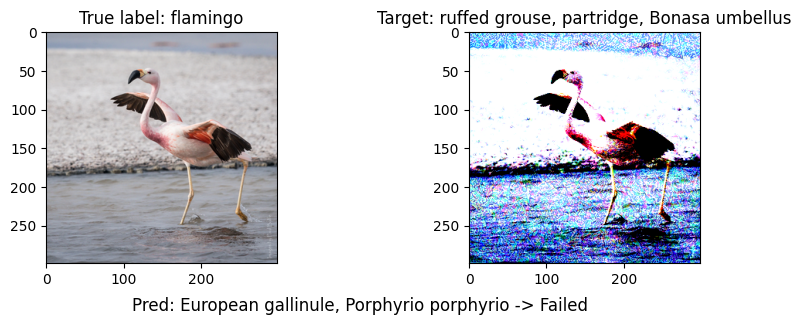

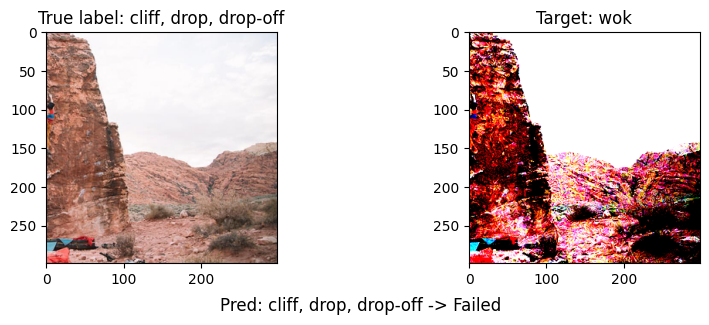

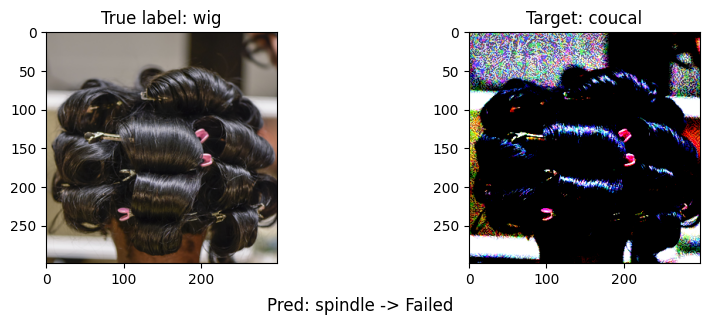

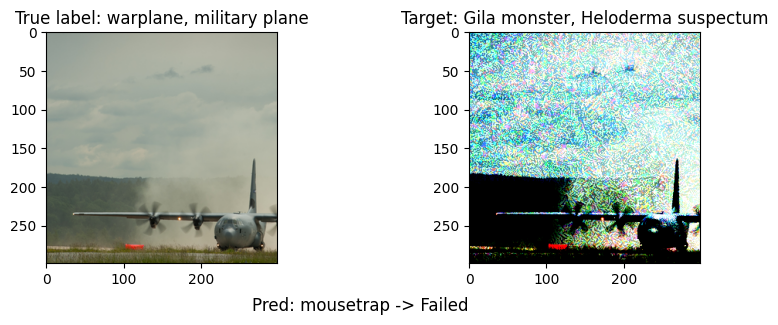

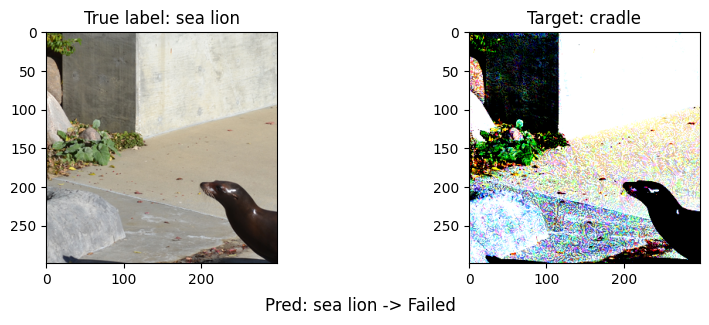

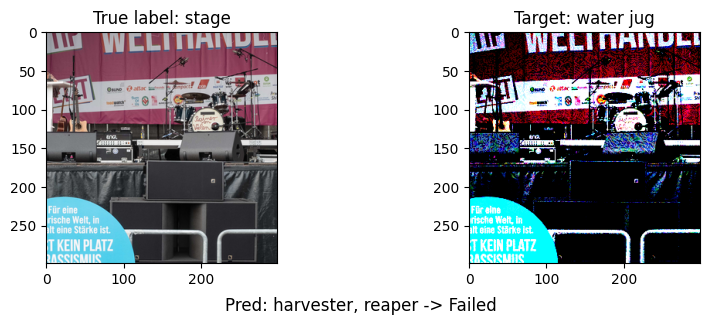

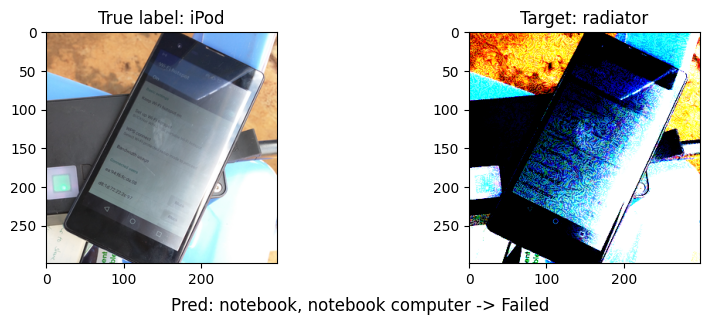

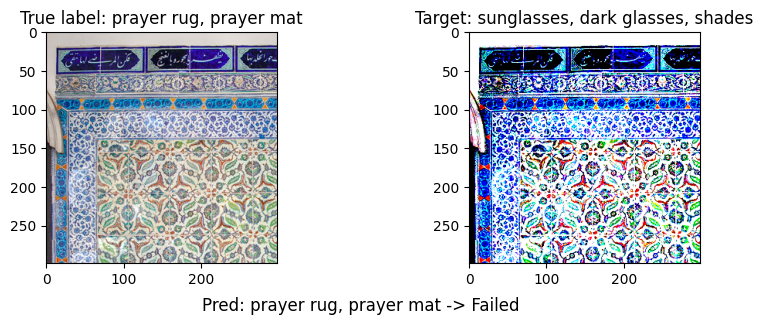

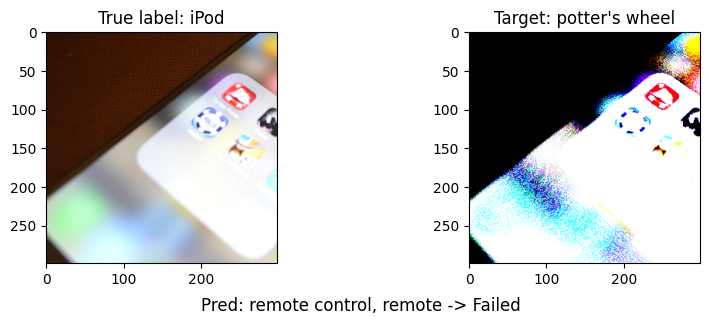

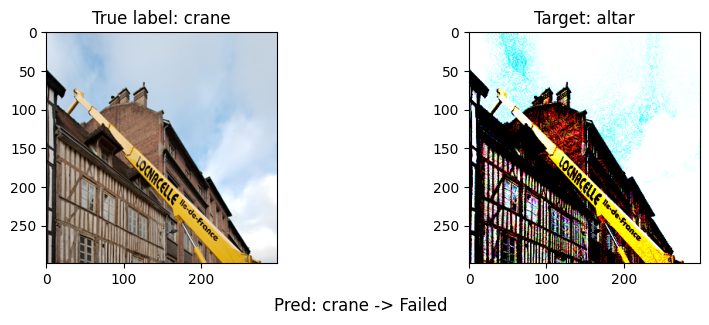

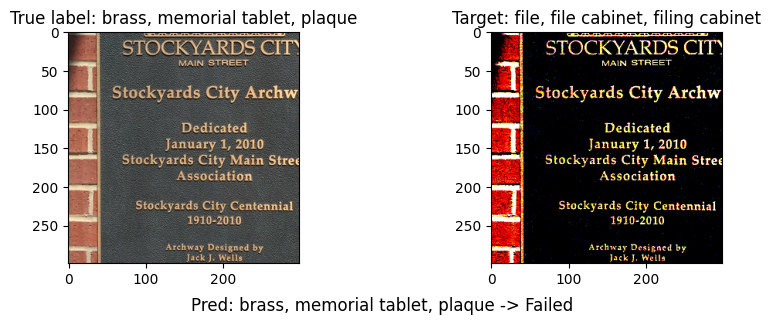

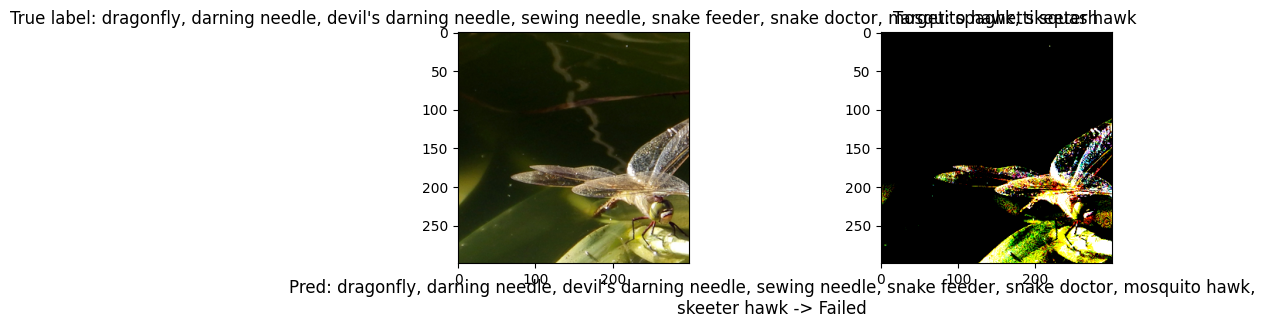

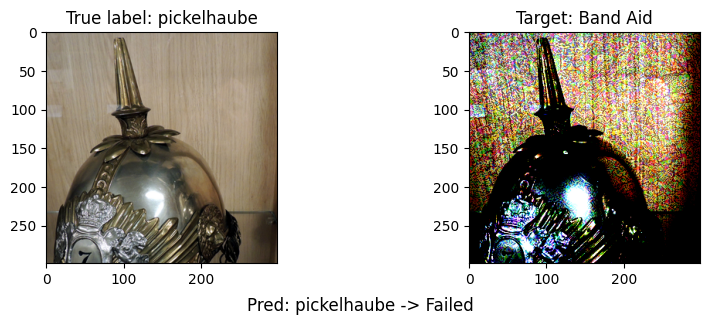

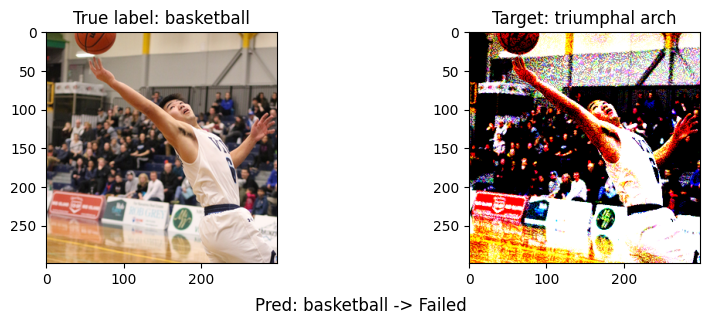

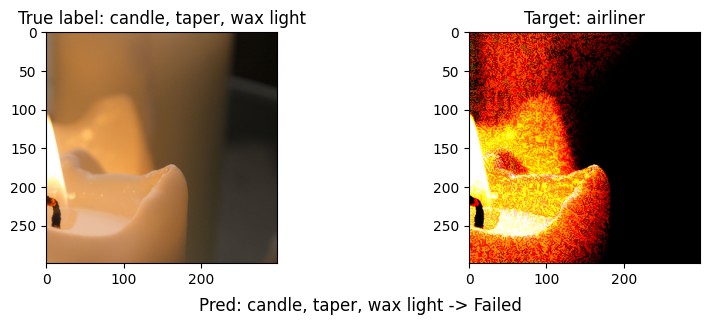

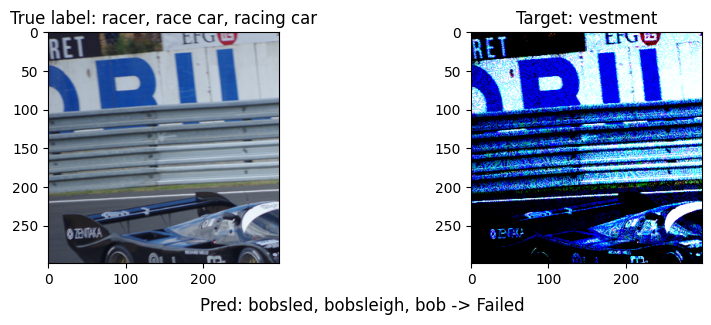

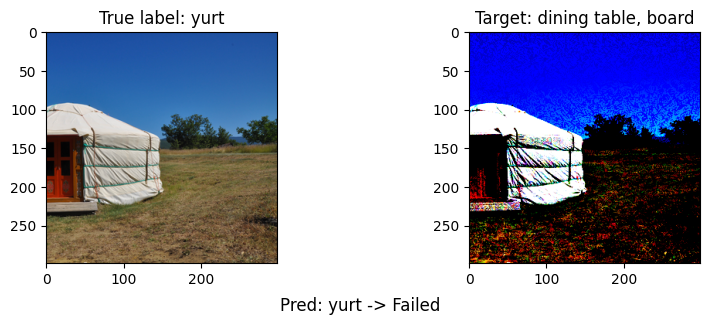

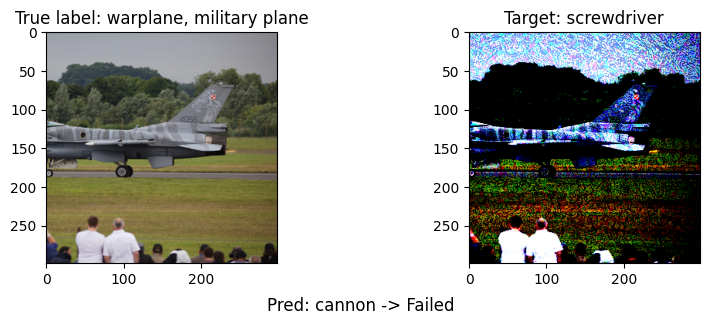

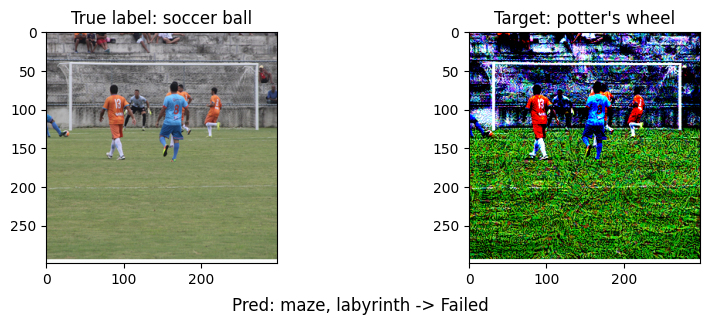

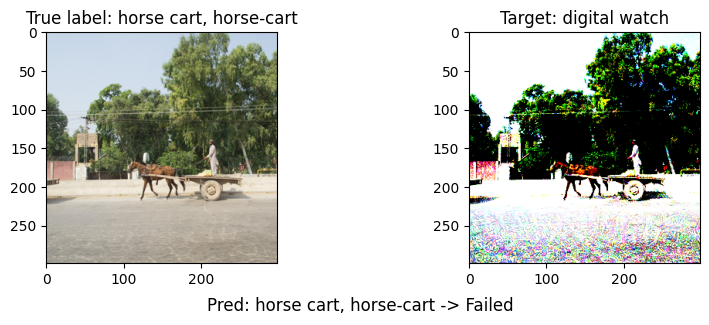

In [ ]:
def viz(img_A, img_B, origins, labels, gt, preds):
    for img_a, img_b, origin, label, pred in zip(img_A, img_B, origins, labels, preds):
        img_a = img_a.permute(1, 2, 0)
        img_b = img_b.permute(1, 2, 0)

        fig, (axA, axB) = plt.subplots(1, 2, figsize=(10,3))
        axA.imshow(img_a)
        axA.set_title("True label: " + gt[origin])
        axB.imshow(img_b)
        axB.set_title("Target: " + gt[label])

        result = 'Failed' if pred != label else 'Success'
        caption = f'Pred: {gt[pred]} -> {result}'
        fig.text(0.5, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=12)

        plt.show()

viz(X_ori.cpu().detach(), X_pur.cpu().detach(), ori_idx, target_labels.cpu().numpy(), gt, preds.cpu().numpy()) # True 와 target label을 보여줌.